# Introduction to neural network classification with tensorflow

In this notebook we're goinf to learn how to write neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples= n_samples,
noise= 0.03,
random_state= 42)

In [3]:
X.shape

(1000, 2)

In [4]:
y.shape

(1000,)

OUr data is little hard to understand right now... let's visualise

In [5]:
import pandas as pd
circles= pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


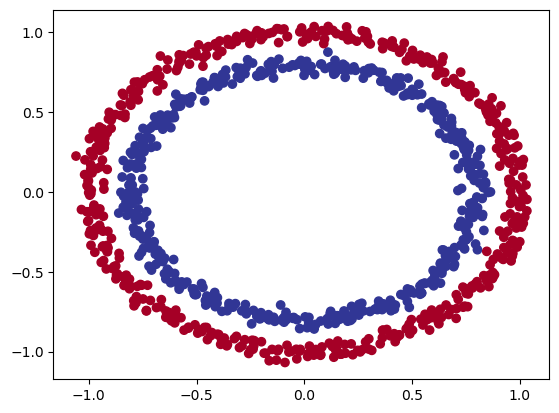

In [6]:
# Visualise with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.RdYlBu)

## Input and Output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

Steps in modelling:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Repeat

# Import tensorflow

In [8]:
import tensorflow as tf

In [9]:
tf.random.set_seed(42) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model.fit(X, y, epochs= 5)

Epoch 1/5


2024-01-25 16:12:04.579606: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 497us/step - loss: 5.8892 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 450us/step - loss: 5.8692 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 405us/step - loss: 5.8582 - accuracy: 0.4840
Epoch 4/5
32/32 [==============================] - 0s 348us/step - loss: 5.8569 - accuracy: 0.4840
Epoch 5/5
32/32 [==============================] - 0s 322us/step - loss: 5.8553 - accuracy: 0.4850


In [10]:
# Let's try and imporve our model by training longer
model.fit(X, y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 347us/step - loss: 4.4011 - accuracy: 0.4710


[4.401130199432373, 0.47099998593330383]

Since we are workling on a binary classification problem and our model is getting around 50% accuracy, it's performing as it is guessing.

So let's step things up and add an extra layer.

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_1.fit(X, y, epochs= 100, verbose= 0)

In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 381us/step - loss: 0.6934 - accuracy: 0.5000


[0.693366527557373, 0.5]

In [13]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Improving our model

Let's look in to our bag of tricks to see how we can imporve our model.

1. Create a model - We might want to:
    1. Add more layers
    2. Add more units
2. Compiling a model: We might want to:
    1. Choose a different optimiser function
3. Fitting a model: We might fit for more epochs

In [26]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), 
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X, y, epochs= 100, verbose= 0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 393us/step - loss: 0.6989 - accuracy: 0.5000


[0.6989321112632751, 0.5]

In [16]:
y_pred = model_2.predict(X)
y_pred

32/32 [==============================] - 0s 280us/step


array([[0.4434227 ],
       [0.46187872],
       [0.46308357],
       [0.46830037],
       [0.42406997],
       [0.4691002 ],
       [0.4655471 ],
       [0.44144902],
       [0.4343534 ],
       [0.47152576],
       [0.44584012],
       [0.45865563],
       [0.46751562],
       [0.43192816],
       [0.42840442],
       [0.430198  ],
       [0.45393616],
       [0.43068555],
       [0.4574037 ],
       [0.44164205],
       [0.44967023],
       [0.47389317],
       [0.42815953],
       [0.444592  ],
       [0.47024435],
       [0.46524552],
       [0.46522868],
       [0.43444827],
       [0.42919996],
       [0.43019286],
       [0.43398416],
       [0.47229478],
       [0.46484202],
       [0.43552595],
       [0.42757782],
       [0.47343346],
       [0.46807396],
       [0.4575485 ],
       [0.4296224 ],
       [0.4520792 ],
       [0.44044784],
       [0.46334374],
       [0.4439795 ],
       [0.43252105],
       [0.44760594],
       [0.45344606],
       [0.42709136],
       [0.461

To visualise our model's predictions, let's create a function 'plot_decision_boundary()'. This function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different feature values
* Make predictions across the meshgrid* Plot the predictions as well as a line between zones

In [17]:
import numpy as np

In [67]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

319/319 [==============================] - 0s 255us/step
doing binary classification


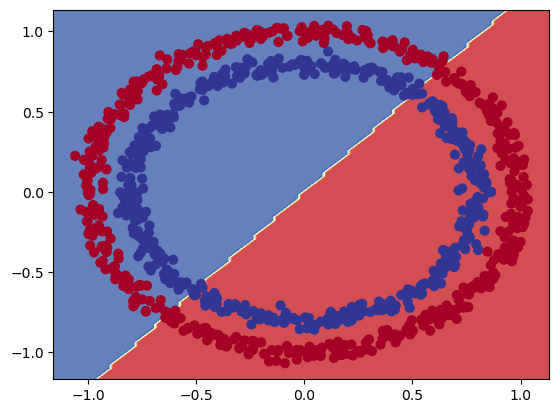

In [72]:
# Check out the predictions our model is making

plot_decision_boundary(model= model_2,
                       X= X, 
                       y= y)

In [31]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_regression[:150], X_regression[150:], y_regression[:150], y_regression[150:]

model_2.fit(X_reg_train, y_reg_train)

ValueError: in user code:

    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But we are now working on a regression problem, let's change the model to suit our data

In [33]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis= 1), y_reg_train, epochs= 100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 368.2196 - mae: 368.2196
Epoch 2/100
5/5 [==============================] - 0s 754us/step - loss: 234.4020 - mae: 234.4020
Epoch 3/100
5/5 [==============================] - 0s 764us/step - loss: 104.9572 - mae: 104.9572
Epoch 4/100
5/5 [==============================] - 0s 668us/step - loss: 58.3502 - mae: 58.3502
Epoch 5/100
5/5 [==============================] - 0s 706us/step - loss: 83.1545 - mae: 83.1545
Epoch 6/100
5/5 [==============================] - 0s 688us/step - loss: 59.4176 - mae: 59.4176
Epoch 7/100
5/5 [==============================] - 0s 716us/step - loss: 44.3290 - mae: 44.3290
Epoch 8/100
5/5 [==============================] - 0s 750us/step - loss: 46.5449 - mae: 46.5449
Epoch 9/100
5/5 [==============================] - 0s 697us/step - loss: 42.9813 - mae: 42.9813
Epoch 10/100
5/5 [==============================] - 0s 733us/step - loss: 43.1010 - mae: 43.1010
Epoch 11/100
5/5 [=================

2/2 [==============================] - 0s 1ms/step


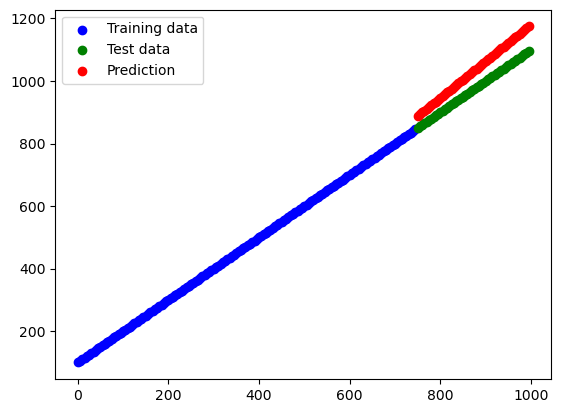

In [39]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figure = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label= "Training data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label= 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label= 'Prediction')
plt.legend()

## The missing piece: Non-linearity

In [40]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'linear')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

model_4.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 526us/step - loss: 4.3545 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 456us/step - loss: 4.2451 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 454us/step - loss: 4.1026 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 359us/step - loss: 3.9475 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 348us/step - loss: 3.8755 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 361us/step - loss: 3.7907 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 337us/step - loss: 3.6814 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 341us/step - loss: 3.4979 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 341us/step - loss: 3.3225 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 409us/step - loss: 3.0618 - accura

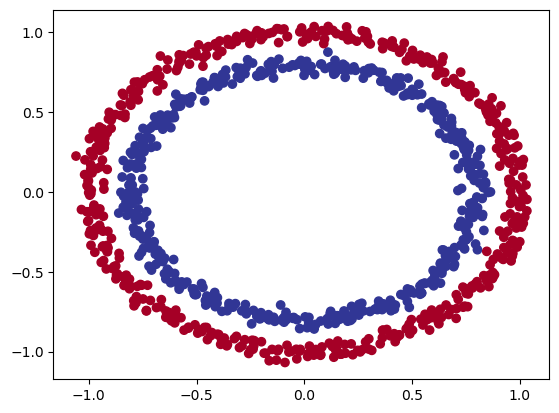

In [73]:
#Check out our data
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

319/319 [==============================] - 0s 254us/step
doing binary classification


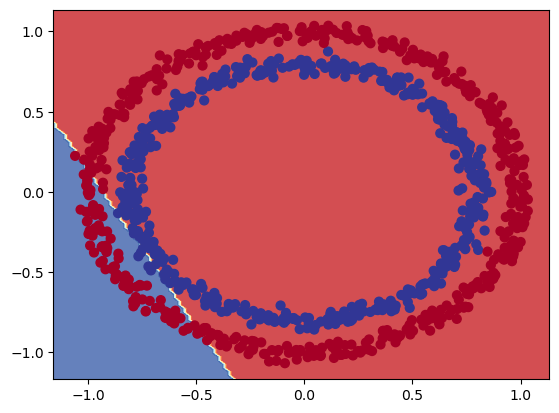

In [69]:
#Check the dedcision boundary for our latest model
plot_decision_boundary(model= model_4,
                       X=X, y=y)

Let's create our first neural network with a non-linear activation function

In [47]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'relu')
])

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_5.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 541us/step - loss: 4.2373 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 433us/step - loss: 2.7000 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 420us/step - loss: 1.5833 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 319us/step - loss: 1.5310 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 347us/step - loss: 1.4970 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 416us/step - loss: 1.4672 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 693us/step - loss: 1.4400 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 343us/step - loss: 1.4148 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 347us/step - loss: 1.3916 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 342us/step - loss: 1.3697 - accura

319/319 [==============================] - 0s 248us/step
doing binary classification


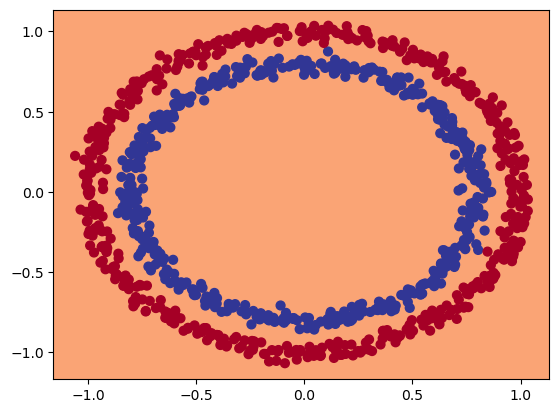

In [74]:
plot_decision_boundary(model_5, X, y)

In [85]:
# Time to replicate the mutli-layer neural network from Tensorflow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_6.fit(X, y, epochs= 250, verbose= 0)

In [86]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 583us/step - loss: 0.0833 - accuracy: 0.9880


[0.08330674469470978, 0.9879999756813049]

319/319 [==============================] - 0s 445us/step
doing binary classification


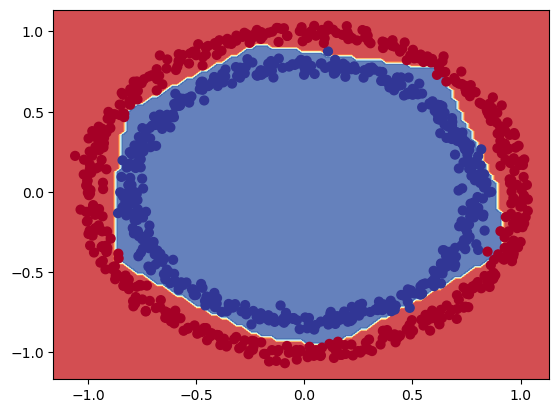

In [87]:
# How do our model prediction look
plot_decision_boundary(model= model_6, X= X,y= y)
plt.show()

In [93]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'softmax')
])

model_7.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics=['accuracy'])

model_7.fit(X, y, epochs= 250, verbose= 0)

In [94]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 611us/step - loss: 0.1378 - accuracy: 0.5000


[0.13782645761966705, 0.5]

319/319 [==============================] - 0s 424us/step
doing binary classification


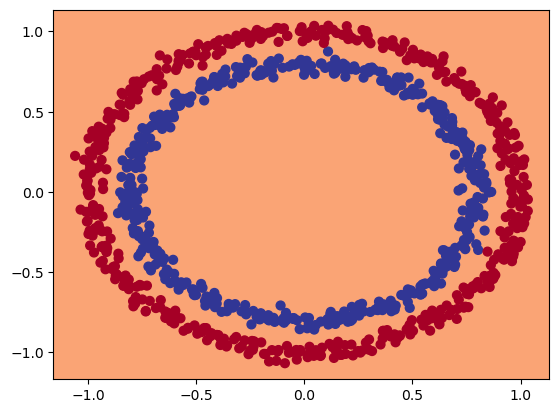

In [95]:
plot_decision_boundary(model_7, X, y)

**Question**: What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What dazta did the model learn on and what data di we predict on.

**Noteo**: Thew combination of **linear** and **non-linear** is one of the key fundamentals of neural networks.

Let's implement linear and non-linear concepts

In [96]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

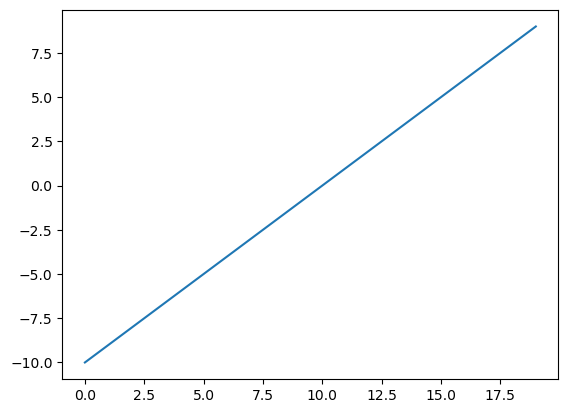

In [97]:
#Visualise our toy tensor

plt.plot(A)

In [98]:
# Let's start replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

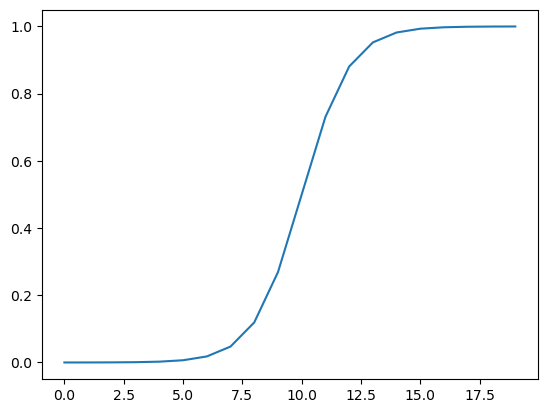

In [108]:
# Plot our toy tensor transformed into sigmoid
plt.plot(sigmoid(A))

In [103]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

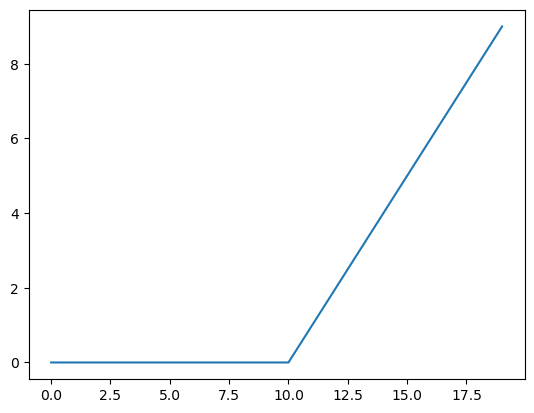

In [106]:
plt.plot(relu(A))

In [111]:
def linear(x):
    return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

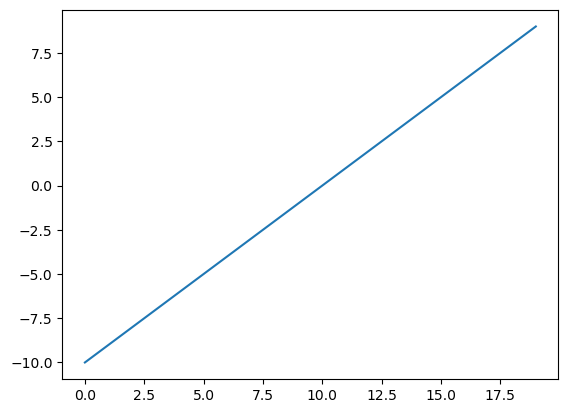

In [112]:
plt.plot(linear(A))

**Reesource**: [Activation function link](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluating and improving our classification

So far we've been training and testing on the same data set

Let's cerate a training and test set

In [113]:
X.shape

(1000, 2)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [118]:
model_6.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 4)                 12        
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [133]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_8.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics= ['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs= 25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.4737
Epoch 2/25
25/25 [==============================] - 0s 840us/step - loss: 0.6933 - accuracy: 0.4500
Epoch 3/25
25/25 [==============================] - 0s 833us/step - loss: 0.6882 - accuracy: 0.5150
Epoch 4/25
25/25 [==============================] - 0s 731us/step - loss: 0.6857 - accuracy: 0.5375
Epoch 5/25
25/25 [==============================] - 0s 640us/step - loss: 0.6808 - accuracy: 0.5387
Epoch 6/25
25/25 [==============================] - 0s 609us/step - loss: 0.6749 - accuracy: 0.5487
Epoch 7/25
25/25 [==============================] - 0s 652us/step - loss: 0.6670 - accuracy: 0.5612
Epoch 8/25
25/25 [==============================] - 0s 690us/step - loss: 0.6550 - accuracy: 0.5700
Epoch 9/25
25/25 [==============================] - 0s 710us/step - loss: 0.6427 - accuracy: 0.5900
Epoch 10/25
25/25 [==============================] - 0s 664us/step - loss: 0.6148 - accuracy: 0.6625
E

In [134]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.9400


[0.19914960861206055, 0.9399999976158142]

319/319 [==============================] - 0s 442us/step
doing binary classification
319/319 [==============================] - 0s 445us/step
doing binary classification


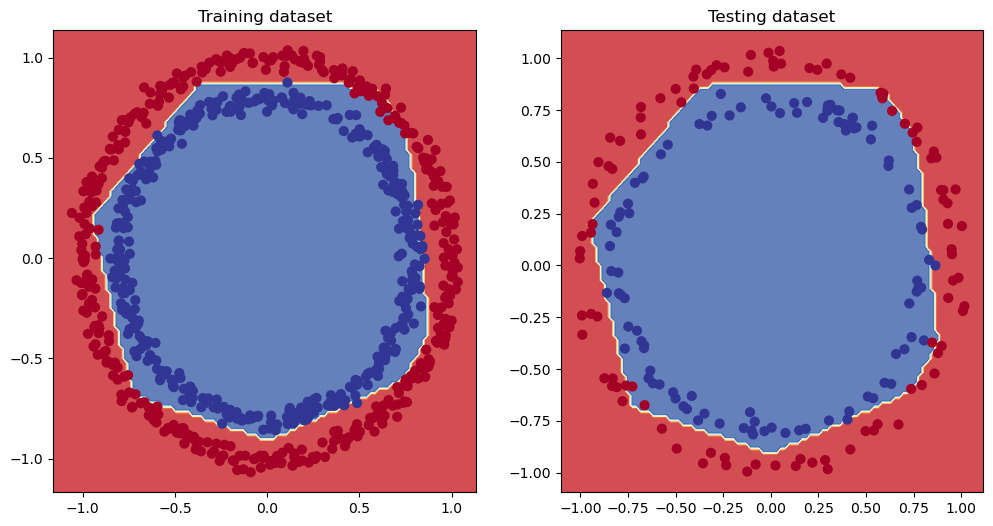

In [135]:
# Plot for both training and test set
plt.figure(figsize= (12, 6))

plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss curves

In [137]:
# Convert the history object into a dataframe

pd.DataFrame(history_8.history)

,loss,accuracy
0,0.699924,0.47375
1,0.693284,0.45000
2,0.688162,0.51500
3,0.685673,0.53750
4,0.680838,0.53875
5,0.674940,0.54875
6,0.666998,0.56125
7,0.655009,0.57000
8,0.642657,0.59000
9,0.614800,0.66250


<Axes: >

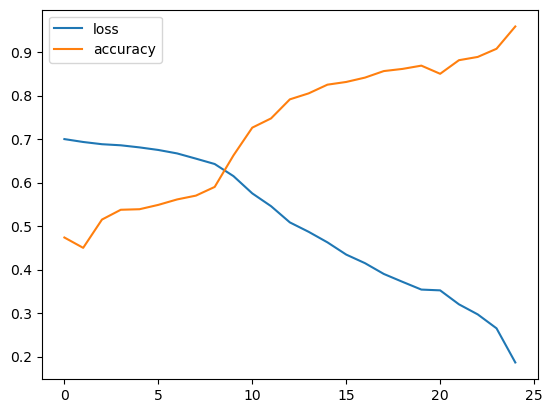

In [138]:
# Plot the loss curves

pd.DataFrame(history_8.history).plot()

**Note**: For many problems, the loss function going down means it is improving.

## Finding the best learning rate

To find the ideal learning rate, we're going to use the following steps:

1. A learing rate **callback** - an extra functionality added to the model **while** training it

2. Another model.

3. A modified loss curve.

In [139]:
# Set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_9.compile(loss= 'binary_crossentropy',
                optimizer= "Adam",
                metrics= ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

#Fit the model
histor_9 = model_9.fit(X_train, y_train, 
                       epochs= 100,
                       callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 750us/step - loss: 0.6920 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 689us/step - loss: 0.6914 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 686us/step - loss: 0.6908 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 625us/step - loss: 0.6902 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 593us/step - loss: 0.6895 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 639us/step - loss: 0.6889 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 621us/step - loss: 0.6882 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 607us/step - loss: 0.6875 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: >

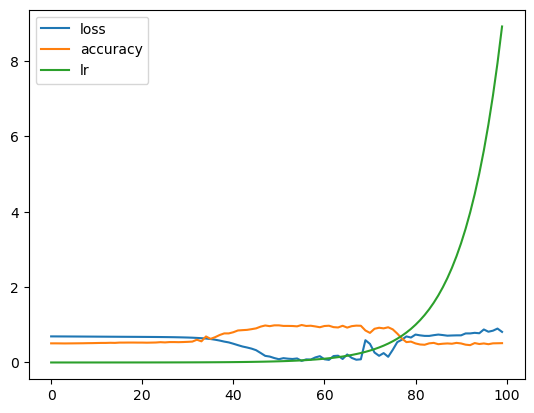

In [140]:
# Checkout the history
pd.DataFrame(histor_9.history).plot()

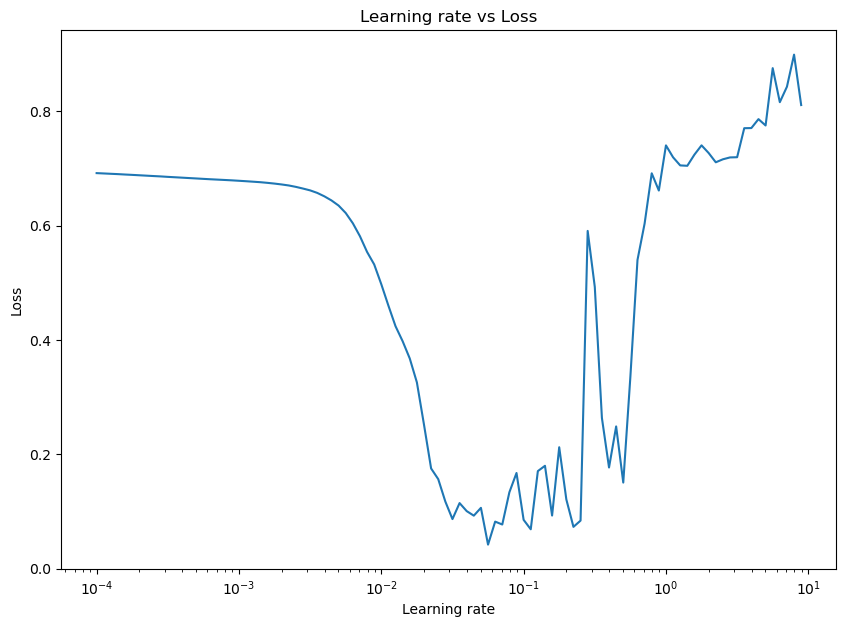

In [143]:
# Plot the learning rate vs the loss
lrs = histor_9.history['lr']
plt.figure(figsize= (10, 7))
plt.semilogx(lrs, histor_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [144]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [148]:
# Let's use a higher *ideal* learning rate with same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_10.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics= ['accuracy'])

histor_10 = model_10.fit(X_train, y_train, epochs= 20)

Epoch 1/20
25/25 [==============================] - 0s 888us/step - loss: 0.6668 - accuracy: 0.6313
Epoch 2/20
25/25 [==============================] - 0s 791us/step - loss: 0.6088 - accuracy: 0.6850
Epoch 3/20
25/25 [==============================] - 0s 783us/step - loss: 0.5201 - accuracy: 0.7625
Epoch 4/20
25/25 [==============================] - 0s 750us/step - loss: 0.3148 - accuracy: 0.9488
Epoch 5/20
25/25 [==============================] - 0s 569us/step - loss: 0.1913 - accuracy: 0.9600
Epoch 6/20
25/25 [==============================] - 0s 580us/step - loss: 0.1077 - accuracy: 0.9950
Epoch 7/20
25/25 [==============================] - 0s 604us/step - loss: 0.0828 - accuracy: 0.9912
Epoch 8/20
25/25 [==============================] - 0s 565us/step - loss: 0.0827 - accuracy: 0.9812
Epoch 9/20
25/25 [==============================] - 0s 583us/step - loss: 0.0596 - accuracy: 0.9900
Epoch 10/20
25/25 [==============================] - 0s 595us/step - loss: 0.0404 - accuracy: 0.9962

In [149]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 839us/step - loss: 0.0445 - accuracy: 0.9800


[0.04452354088425636, 0.9800000190734863]

In [150]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 902us/step - loss: 0.1991 - accuracy: 0.9400


[0.19914960861206055, 0.9399999976158142]

319/319 [==============================] - 0s 423us/step
doing binary classification
319/319 [==============================] - 0s 416us/step
doing binary classification


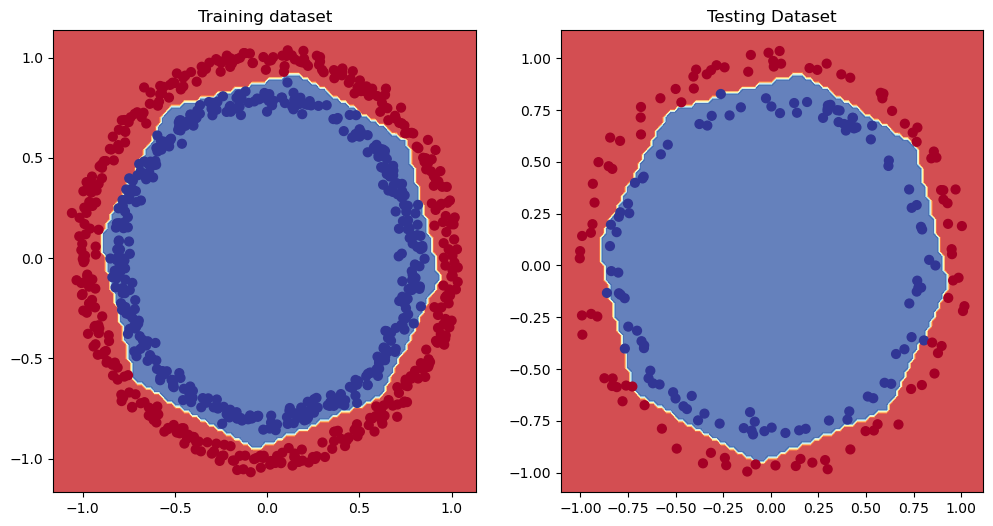

In [151]:
# Plot the decisoin boundaries for the training and test sets

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset")
plot_decision_boundary(model_10, X_test, y_test)

## More classification Evaluation Methods

There are other classification evaluation methods which are helpful for monitoring the performance:

* Accuracy
* Precision
* Recall
* F1-score 
* Confusion Matrix
* Classification report from scikit-learn

In [153]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {(accuracy * 10):.2f}")

7/7 [==============================] - 0s 750us/step - loss: 0.0445 - accuracy: 0.9800
Model loss on the test set: 0.04
Model accuracy on the test set: 9.80


How about a confusion matrix?

In [169]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

7/7 [==============================] - 0s 721us/step


array([[99,  1],
       [ 3, 97]])

In [166]:
y_pred[:10]

array([[9.93362665e-01],
       [9.75380652e-04],
       [9.93362665e-01],
       [3.42732164e-07],
       [9.47886109e-01],
       [9.61191297e-01],
       [1.08715554e-04],
       [5.35721256e-07],
       [9.91931319e-01],
       [6.59949088e-04]], dtype=float32)

Our prediction has come out to in **prediction probability** from standard output

How about we prettify our confusion matrix?

**Note**: the confusion matrix code is a remix of scikit-learn plot_confusion_matrix code

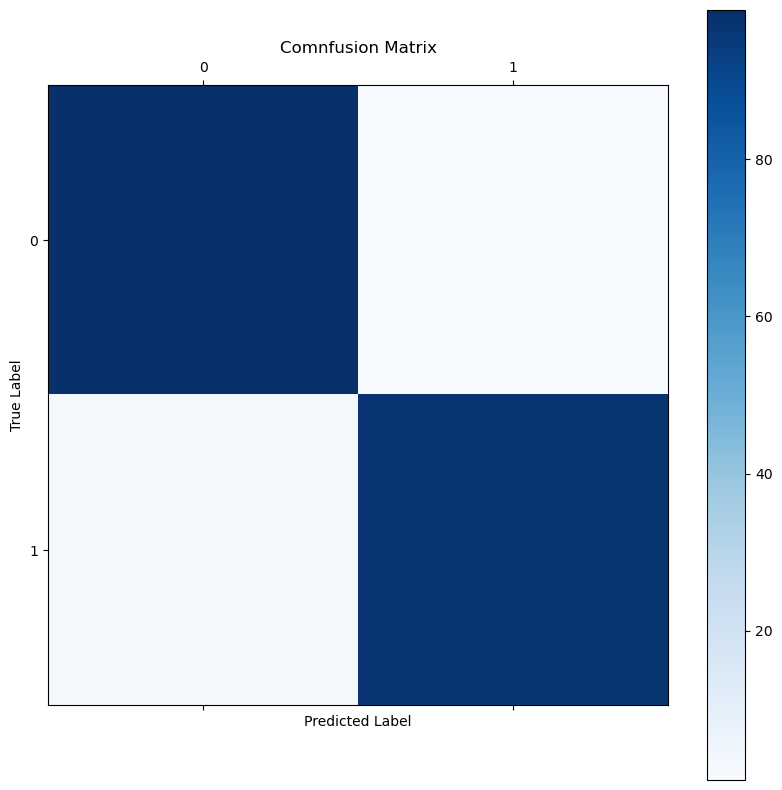

In [173]:
import itertools

figsize = (10, 10)

#Xreate the confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's pretify it
fig, ax = plt.subplots(figsize= figsize)

cax = ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title= "Comnfusion Matrix",
       xlabel= "Predicted Label",
       ylabel= "True Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels) 

threshold = (cm.max() + cm.min()) / 2
